In [2]:
#import the required libraries
import pandas as pd
import re
import seaborn as sns
from typing import List
from pandas import DataFrame

In [3]:
# https://en.wikipedia.org/wiki/List_of_Netflix_original_films_(2015-2017)
# https://en.wikipedia.org/wiki/List_of_Netflix_original_films_(2018)
# https://en.wikipedia.org/wiki/List_of_Netflix_original_films_(2019)
# https://en.wikipedia.org/wiki/List_of_Netflix_original_films_(2020)
# https://en.wikipedia.org/wiki/List_of_Netflix_original_films_(2021)
# https://en.wikipedia.org/wiki/List_of_Netflix_original_films_(2022)

BASE_URL: str = "https://en.wikipedia.org/wiki/List_of_Netflix_original_films_({year})"
YEARS: list = ["2015-2017", "2018", "2019", "2020", "2021", "2022"]

for value in YEARS:
    full_url = BASE_URL.format(year=value)
    print(full_url)

https://en.wikipedia.org/wiki/List_of_Netflix_original_films_(2015-2017)
https://en.wikipedia.org/wiki/List_of_Netflix_original_films_(2018)
https://en.wikipedia.org/wiki/List_of_Netflix_original_films_(2019)
https://en.wikipedia.org/wiki/List_of_Netflix_original_films_(2020)
https://en.wikipedia.org/wiki/List_of_Netflix_original_films_(2021)
https://en.wikipedia.org/wiki/List_of_Netflix_original_films_(2022)


In [4]:
films_2019: List[DataFrame] = pd.read_html("https://en.wikipedia.org/wiki/List_of_Netflix_original_films_(2019)")

print("Size of films_2019 is {}".format(len(films_2019)))

Size of films_2019 is 4


In [5]:
#Get the feature films for the year 2019 from index 0
films_2019[0]

,Title,Genre,Premiere,Runtime,Language
0,Lionheart,Comedy,"January 4, 2019",1 h 34 min,English
1,The Last Laugh,Comedy drama,"January 11, 2019",1 h 38 min,English
2,IO,Science fiction / Drama,"January 18, 2019",1 h 36 min,English
3,Soni,Crime drama,"January 18, 2019",1 h 37 min,Hindi
4,Polar,Action,"January 25, 2019",1 h 58 min,English
...,...,...,...,...,...
70,Marriage Story,Drama,"December 6, 2019",2 h 16 min,English
71,6 Underground,Action,"December 13, 2019",2 h 8 min,English
72,The Two Popes,Drama,"December 20, 2019",2 h 5 min,English
73,Como caído del cielo,Musical comedy,"December 24, 2019",1 h 57 min,Spanish


In [6]:
films_2019[1].head()

,Title,Premiere,Runtime,Language
0,ReMastered: Massacre at the Stadium,"January 11, 2019",1 h 4 min,English
1,Fyre: The Greatest Party That Never Happened,"January 18, 2019",1 h 37 min,English
2,ReMastered: The Two Killings of Sam Cooke,"February 8, 2019",1 h 4 min,English
3,Period. End of Sentence.,"February 12, 2019",26 min,Hindi
4,Antoine Griezmann: The Making of a Legend,"March 21, 2019",1 hour,French


In [7]:
films_2019[2]

,Title,Genre,Premiere,Runtime,Language
0,Kevin Hart's Guide to Black History,Variety show,"February 8, 2019",1 h 3 min,English
1,Still Laugh-In: The Stars Celebrate,Variety show,"May 14, 2019",1 h,English
2,The Lonely Island Presents: The Unauthorized B...,Comedy / Musical,"May 23, 2019",30 min,English
3,Anima,Musical / Short,"June 27, 2019",15 min,English
4,"Frankenstein's Monster's Monster, Frankenstein",Mockumentary,"July 16, 2019",32 min,English
5,Rocko's Modern Life: Static Cling,Animation / Comedy,"August 9, 2019",45 min,English
6,American Factory: A Conversation with the Obamas,Aftershow / Interview,"August 21, 2019",10 min,English
7,Sturgill Simpson Presents: Sound & Fury,Animation / Musical,"September 27, 2019",41 min,English
8,The Road to El Camino: A Breaking Bad Movie,Making-of,"October 29, 2019",13 min,English
9,The Irishman: In Conversation,Aftershow / Interview,"November 27, 2019",23 min,English


In [7]:
# Create an empty dataframe to hold all the feature films.
feature_films: DataFrame = pd.DataFrame()

# Create an empty dataframe to hold all the documentaries.
documentaries: DataFrame = pd.DataFrame()

# Create an empty dataframe to hold all the specials.
specials: DataFrame = pd.DataFrame()

BASE_URL: str = "https://en.wikipedia.org/wiki/List_of_Netflix_original_films_({year})"
YEARS: list = ["2015-2017", "2018", "2019", "2020", "2021", "2022"]
    
    
def get_netflix_movies_from_wikipedia(yrs: List[str], extractFF: bool=True, 
                                      extractDocu: bool=True, extractSpecials: bool=True) -> List[list]:
    if extractFF:
        feature_films: DataFrame = pd.DataFrame()
    if extractDocu:
        documentaries: DataFrame = pd.DataFrame()
    if extractSpecials:
        specials: DataFrame = pd.DataFrame()
    
    for value in YEARS:
    full_url: str = BASE_URL.format(year=value)
    netflix_movies: List[DataFrame] = pd.read_html(full_url)
    feature_films = pd.concat([feature_films, netflix_movies[0]])
    documentaries = pd.concat([documentaries, netflix_movies[1]])
    specials = pd.concat([specials, netflix_movies[2]])

# loop through the list and store all the feature films, documentaries and specials into 
# their respective empty dataframes created above
for value in YEARS:
    full_url: str = BASE_URL.format(year=value)
    netflix_movies: List[DataFrame] = pd.read_html(full_url)
    feature_films = pd.concat([feature_films, netflix_movies[0]])
    documentaries = pd.concat([documentaries, netflix_movies[1]])
    specials = pd.concat([specials, netflix_movies[2]])

In [ ]:
BASE_URL: str = "https://en.wikipedia.org/wiki/List_of_Netflix_original_films_({year})"
YEARS: list = ["2015-2017", "2018", "2019", "2020", "2021", "2022"]
    
    
def get_netflix_movies_from_wikipedia(years: List[str], extractFF: bool=True, 
                                      extractDocu: bool=True, extractSpecials: bool=True) -> List[list]:
    if extractFF:
        feature_films: DataFrame = pd.DataFrame()
    if extractDocu:
        documentaries: DataFrame = pd.DataFrame()
    if extractSpecials:
        specials: DataFrame = pd.DataFrame()
    
    for value in YEARS:
        full_url: str = BASE_URL.format(year=value)
        netflix_movies: List[DataFrame] = pd.read_html(full_url)
        feature_films = pd.concat([feature_films, netflix_movies[0]])
        documentaries = pd.concat([documentaries, netflix_movies[1]])
        specials = pd.concat([specials, netflix_movies[2]])

In [8]:
#Get the head of the feature films(first elements in the dataframe)
feature_films.head(10)

,Title,Genre,Premiere,Runtime,Language
0,Beasts of No Nation,War drama,"October 16, 2015",2 h 17 min,English
1,The Ridiculous 6,Western,"December 11, 2015",2 h,English
2,Pee-wee's Big Holiday,Adventure,"March 18, 2016",1 h 30 min,English
3,Special Correspondents,Satire,"April 29, 2016",1 h 41 min,English
4,The Do-Over,Action comedy,"May 27, 2016",1 h 48 min,English
5,The Fundamentals of Caring,Comedy drama,"June 24, 2016",1 h 37 min,English
6,Brahman Naman,Comedy,"July 7, 2016",1 h 35 min,English
7,Rebirth,Thriller,"July 15, 2016",1 h 40 min,English
8,Tallulah,Comedy drama,"July 29, 2016",1 h 51 min,English
9,XOXO,Drama,"August 26, 2016",1 h 32 min,English


In [9]:
#Get the tail of the feature films(last elements in the dataframe)
feature_films.tail(10)

,Title,Genre,Premiere,Runtime,Language
162,The Marriage App,Drama,"December 7, 2022",1 h 41 min,Spanish
163,Guillermo del Toro's Pinocchio,Stop motion fantasy musical drama,"December 9, 2022",1 h 56 min,English
164,I Believe in Santa,Romantic comedy,"December 14, 2022",1 h 30 min,English
165,The Big 4,Action comedy,"December 15, 2022",2 h 21 min,Indonesian
166,"Bardo, False Chronicle of a Handful of Truths",Comedy,"December 16, 2022",2 h 39 min,Spanish
167,Private Lesson,Romantic comedy,"December 16, 2022",1 h 29 min,Turkish
168,A Not So Merry Christmas,Comedy,"December 20, 2022",1 h 40 min,Spanish
169,Glass Onion: A Knives Out Mystery,Murder mystery,"December 23, 2022",2 h 19 min,English
170,A Night at the Kindergarten,Black comedy,"December 28, 2022",1 h 37 min,Polish
171,White Noise,Black comedy,"December 30, 2022",2 h 16 min,English


In [10]:
#Get the shape of the feature_films dataframe (number of rows and columns)
feature_films.shape

(657, 5)

In [11]:
# Reindex the dataframe 
feature_films.index = range(len(feature_films.index))
feature_films.tail(10)

,Title,Genre,Premiere,Runtime,Language
647,The Marriage App,Drama,"December 7, 2022",1 h 41 min,Spanish
648,Guillermo del Toro's Pinocchio,Stop motion fantasy musical drama,"December 9, 2022",1 h 56 min,English
649,I Believe in Santa,Romantic comedy,"December 14, 2022",1 h 30 min,English
650,The Big 4,Action comedy,"December 15, 2022",2 h 21 min,Indonesian
651,"Bardo, False Chronicle of a Handful of Truths",Comedy,"December 16, 2022",2 h 39 min,Spanish
652,Private Lesson,Romantic comedy,"December 16, 2022",1 h 29 min,Turkish
653,A Not So Merry Christmas,Comedy,"December 20, 2022",1 h 40 min,Spanish
654,Glass Onion: A Knives Out Mystery,Murder mystery,"December 23, 2022",2 h 19 min,English
655,A Night at the Kindergarten,Black comedy,"December 28, 2022",1 h 37 min,Polish
656,White Noise,Black comedy,"December 30, 2022",2 h 16 min,English


In [13]:
feature_films.info

<bound method DataFrame.info of                                  Title            Genre           Premiere  \
0                  Beasts of No Nation        War drama   October 16, 2015   
1                     The Ridiculous 6          Western  December 11, 2015   
2                Pee-wee's Big Holiday        Adventure     March 18, 2016   
3               Special Correspondents           Satire     April 29, 2016   
4                          The Do-Over    Action comedy       May 27, 2016   
..                                 ...              ...                ...   
652                     Private Lesson  Romantic comedy  December 16, 2022   
653           A Not So Merry Christmas           Comedy  December 20, 2022   
654  Glass Onion: A Knives Out Mystery   Murder mystery  December 23, 2022   
655        A Night at the Kindergarten     Black comedy  December 28, 2022   
656                        White Noise     Black comedy  December 30, 2022   

        Runtime Language  
0   

In [12]:
feature_films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     657 non-null    object
 1   Genre     657 non-null    object
 2   Premiere  657 non-null    object
 3   Runtime   657 non-null    object
 4   Language  657 non-null    object
dtypes: object(5)
memory usage: 25.8+ KB


In [14]:
# Convert the Column "Premiere" into a datetime object to make it easier to work with
feature_films["Premiere"] = pd.to_datetime(feature_films["Premiere"], infer_datetime_format=True)

In [15]:
feature_films

,Title,Genre,Premiere,Runtime,Language
0,Beasts of No Nation,War drama,2015-10-16,2 h 17 min,English
1,The Ridiculous 6,Western,2015-12-11,2 h,English
2,Pee-wee's Big Holiday,Adventure,2016-03-18,1 h 30 min,English
3,Special Correspondents,Satire,2016-04-29,1 h 41 min,English
4,The Do-Over,Action comedy,2016-05-27,1 h 48 min,English
...,...,...,...,...,...
652,Private Lesson,Romantic comedy,2022-12-16,1 h 29 min,Turkish
653,A Not So Merry Christmas,Comedy,2022-12-20,1 h 40 min,Spanish
654,Glass Onion: A Knives Out Mystery,Murder mystery,2022-12-23,2 h 19 min,English
655,A Night at the Kindergarten,Black comedy,2022-12-28,1 h 37 min,Polish


In [16]:
feature_films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Title     657 non-null    object        
 1   Genre     657 non-null    object        
 2   Premiere  657 non-null    datetime64[ns]
 3   Runtime   657 non-null    object        
 4   Language  657 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 25.8+ KB


In [18]:
#Extract the day, day_name, quarter, week_number, half_year, month and year from the Premiere column
feature_films["day"] = feature_films["Premiere"].dt.day
feature_films["day_name"] = feature_films["Premiere"].dt.day_name()
feature_films["month"] = feature_films["Premiere"].dt.month
feature_films["month_name"] = feature_films["Premiere"].dt.month_name()
feature_films["year"] = feature_films["Premiere"].dt.year
feature_films['quarter_year'] = pd.PeriodIndex(feature_films["Premiere"], freq='Q')
feature_films['quarter'] = feature_films["Premiere"].dt.quarter
feature_films['week_number'] = feature_films["Premiere"].dt.isocalendar().week
feature_films['half_year'] = feature_films["Premiere"].dt.month.apply(lambda x: "H1" if x in range(0, 7) else "H2")

#Observe the dataframe
feature_films

,Title,Genre,Premiere,Runtime,Language,day,day_name,month,month_name,year,quarter_year,quarter,week_number,half_year
0,Beasts of No Nation,War drama,2015-10-16,2 h 17 min,English,16,Friday,10,October,2015,2015Q4,4,42,H2
1,The Ridiculous 6,Western,2015-12-11,2 h,English,11,Friday,12,December,2015,2015Q4,4,50,H2
2,Pee-wee's Big Holiday,Adventure,2016-03-18,1 h 30 min,English,18,Friday,3,March,2016,2016Q1,1,11,H1
3,Special Correspondents,Satire,2016-04-29,1 h 41 min,English,29,Friday,4,April,2016,2016Q2,2,17,H1
4,The Do-Over,Action comedy,2016-05-27,1 h 48 min,English,27,Friday,5,May,2016,2016Q2,2,21,H1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,Private Lesson,Romantic comedy,2022-12-16,1 h 29 min,Turkish,16,Friday,12,December,2022,2022Q4,4,50,H2
653,A Not So Merry Christmas,Comedy,2022-12-20,1 h 40 min,Spanish,20,Tuesday,12,December,2022,2022Q4,4,51,H2
654,Glass Onion: A Knives Out Mystery,Murder mystery,2022-12-23,2 h 19 min,English,23,Friday,12,December,2022,2022Q4,4,51,H2
655,A Night at the Kindergarten,Black comedy,2022-12-28,1 h 37 min,Polish,28,Wednesday,12,December,2022,2022Q4,4,52,H2


# Perform some Analysis on the Dataframe to look for interesting insights
This include knowing which movie had the longest runtime, the lowest runtime, which month was the most movies released, which genre had the most movies, breakdown of the movies by language, breakdown of the movies by genre etc

## On which day were movies released the most?

In [19]:
feature_films["day"].value_counts()

16    30
1     29
15    27
18    26
11    26
28    26
30    25
2     24
29    23
23    23
24    23
14    23
10    23
5     23
9     22
13    22
26    21
7     21
12    21
27    21
21    20
8     19
20    19
19    18
3     17
17    17
22    17
6     16
4     15
25    13
31     7
Name: day, dtype: int64

## On which day of the week were movies released the most?

In [20]:
feature_films["day_name"].value_counts()

Friday       419
Wednesday    120
Thursday      83
Tuesday       15
Monday        10
Sunday         6
Saturday       4
Name: day_name, dtype: int64

## Which month were movies released the most?

In [21]:
feature_films["month_name"].value_counts()

October      85
November     74
December     64
April        60
September    56
July         51
August       50
March        47
June         45
May          44
February     42
January      39
Name: month_name, dtype: int64

## Which quarter were movies released the most?

In [22]:
feature_films["quarter"].value_counts()

4    223
3    157
2    149
1    128
Name: quarter, dtype: int64

## Which week number were movies released the most

In [23]:
feature_films["week_number"].value_counts()

48    21
49    21
40    20
46    20
41    20
44    19
43    19
13    18
42    17
45    16
18    15
50    15
15    15
37    15
17    15
39    15
34    14
28    14
6     13
38    13
33    13
8     13
30    13
12    13
31    12
51    12
26    12
47    12
14    11
2     11
36    11
3     11
20    10
27    10
23    10
35    10
25    10
11    10
21    10
24    10
22    10
32     9
16     9
10     9
4      9
29     8
5      8
52     8
19     7
7      7
1      7
9      6
53     1
Name: week_number, dtype: Int64

## Which year were movies released the most

In [24]:
feature_films["year"].value_counts()

2022    172
2021    158
2020    125
2019     74
2018     69
2017     40
2016     17
2015      2
Name: year, dtype: int64

## How many genres are there 

In [25]:
feature_films["Genre"].unique()

array(['War drama', 'Western', 'Adventure', 'Satire', 'Action comedy',
       'Comedy drama', 'Comedy', 'Thriller', 'Drama',
       'Science fiction / Thriller', 'War', 'Mockumentary', 'Horror',
       'Science fiction / Action', 'Biopic', 'Heist',
       'Science fiction / Drama', 'Romance', 'Dark comedy',
       'Anime / Science fiction', 'War-Comedy', 'Crime thriller',
       'Action-adventure', 'Horror thriller', 'Comedy horror',
       'Black comedy', 'Teen comedy horror', 'Horror / Crime drama',
       'Action thriller', 'Romantic comedy', 'Romantic drama',
       'Urban fantasy', 'Biographical / Comedy', 'Science fiction',
       'Science fiction / Mystery', 'Crime drama', 'Family',
       'Action / Comedy', 'Musical / Western / Fantasy', 'Sports-drama',
       'Teen comedy-drama', 'Drama / Horror', 'Adventure / Comedy',
       'Action-thriller', 'Romantic comedy-drama', 'Spy thriller',
       'Horror-thriller', 'Musical', 'Historical-epic',
       'Psychological horror', 'Chris

In [26]:
feature_films["Genre"].nunique()

152

## Which genre had the most movies

In [ ]:
feature_films["Genre"].value_counts()

## How many movies were released for each language 

In [ ]:
feature_films["Language"].value_counts()

## Which language had the most movies released and how many was it

In [ ]:
feature_films["Language"].value_counts().iloc[:1]

## How many unique languages are there in the dataframe

In [ ]:
feature_films["Language"].unique()

In [ ]:
feature_films["Language"].nunique()

In [ ]:
feature_films[feature_films["Language"] == 'Yoruba']

In [27]:
feature_films

,Title,Genre,Premiere,Runtime,Language,day,day_name,month,month_name,year,quarter_year,quarter,week_number,half_year
0,Beasts of No Nation,War drama,2015-10-16,2 h 17 min,English,16,Friday,10,October,2015,2015Q4,4,42,H2
1,The Ridiculous 6,Western,2015-12-11,2 h,English,11,Friday,12,December,2015,2015Q4,4,50,H2
2,Pee-wee's Big Holiday,Adventure,2016-03-18,1 h 30 min,English,18,Friday,3,March,2016,2016Q1,1,11,H1
3,Special Correspondents,Satire,2016-04-29,1 h 41 min,English,29,Friday,4,April,2016,2016Q2,2,17,H1
4,The Do-Over,Action comedy,2016-05-27,1 h 48 min,English,27,Friday,5,May,2016,2016Q2,2,21,H1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,Private Lesson,Romantic comedy,2022-12-16,1 h 29 min,Turkish,16,Friday,12,December,2022,2022Q4,4,50,H2
653,A Not So Merry Christmas,Comedy,2022-12-20,1 h 40 min,Spanish,20,Tuesday,12,December,2022,2022Q4,4,51,H2
654,Glass Onion: A Knives Out Mystery,Murder mystery,2022-12-23,2 h 19 min,English,23,Friday,12,December,2022,2022Q4,4,51,H2
655,A Night at the Kindergarten,Black comedy,2022-12-28,1 h 37 min,Polish,28,Wednesday,12,December,2022,2022Q4,4,52,H2


In [28]:
first_time = "2 h 17 min"
print(first_time)

2 h 17 min


In [30]:
print(re.findall("^\d+\sh", first_time))
print(re.findall("\s\d+\smin", first_time))

['2 h']
[' 17 min']


In [31]:
sec_time = "2 h 17 min 10 sec"
print(re.findall("\d+\ssec", sec_time))

['10 sec']


In [50]:
def get_total_time_in_mins(duration: str) -> int:
    hours = re.findall("^\d+\sh", duration)
    mins = re.findall("\d+\smin", duration)
    hours_int, mins_int = 0, 0
    if hours:
        hours = hours[0].replace("h", "").strip()
        hours_int = int(hours)
    if mins:
        mins = mins[0].replace("min", "").strip()
        mins_int = int(mins)    
    return hours_int*60 + mins_int

print(get_total_time_in_mins("2 h 17 min"))

137


In [51]:
assert get_total_time_in_mins("2 h 17 min") == 137
assert get_total_time_in_mins("1 h 40 min") == 100
assert get_total_time_in_mins("2 h") == 120
assert get_total_time_in_mins("80 min") == 80
assert get_total_time_in_mins("2 h 1 min") == 121
assert get_total_time_in_mins("0 h 0 min") == 0

In [53]:
feature_films["Runtime_mins"] = feature_films["Runtime"].apply(get_total_time_in_mins)
feature_films.head(8)

,Title,Genre,Premiere,Runtime,Language,day,day_name,month,month_name,year,quarter_year,quarter,week_number,half_year,Runtime_mins
0,Beasts of No Nation,War drama,2015-10-16,2 h 17 min,English,16,Friday,10,October,2015,2015Q4,4,42,H2,137
1,The Ridiculous 6,Western,2015-12-11,2 h,English,11,Friday,12,December,2015,2015Q4,4,50,H2,120
2,Pee-wee's Big Holiday,Adventure,2016-03-18,1 h 30 min,English,18,Friday,3,March,2016,2016Q1,1,11,H1,90
3,Special Correspondents,Satire,2016-04-29,1 h 41 min,English,29,Friday,4,April,2016,2016Q2,2,17,H1,101
4,The Do-Over,Action comedy,2016-05-27,1 h 48 min,English,27,Friday,5,May,2016,2016Q2,2,21,H1,108
5,The Fundamentals of Caring,Comedy drama,2016-06-24,1 h 37 min,English,24,Friday,6,June,2016,2016Q2,2,25,H1,97
6,Brahman Naman,Comedy,2016-07-07,1 h 35 min,English,7,Thursday,7,July,2016,2016Q3,3,27,H2,95
7,Rebirth,Thriller,2016-07-15,1 h 40 min,English,15,Friday,7,July,2016,2016Q3,3,28,H2,100


In [60]:
feature_films.tail(10)

,Title,Genre,Premiere,Runtime,Language,day,day_name,month,month_name,year,quarter_year,quarter,week_number,half_year,Runtime_mins
647,The Marriage App,Drama,2022-12-07,1 h 41 min,Spanish,7,Wednesday,12,December,2022,2022Q4,4,49,H2,101
648,Guillermo del Toro's Pinocchio,Stop motion fantasy musical drama,2022-12-09,1 h 56 min,English,9,Friday,12,December,2022,2022Q4,4,49,H2,116
649,I Believe in Santa,Romantic comedy,2022-12-14,1 h 30 min,English,14,Wednesday,12,December,2022,2022Q4,4,50,H2,90
650,The Big 4,Action comedy,2022-12-15,2 h 21 min,Indonesian,15,Thursday,12,December,2022,2022Q4,4,50,H2,141
651,"Bardo, False Chronicle of a Handful of Truths",Comedy,2022-12-16,2 h 39 min,Spanish,16,Friday,12,December,2022,2022Q4,4,50,H2,159
652,Private Lesson,Romantic comedy,2022-12-16,1 h 29 min,Turkish,16,Friday,12,December,2022,2022Q4,4,50,H2,89
653,A Not So Merry Christmas,Comedy,2022-12-20,1 h 40 min,Spanish,20,Tuesday,12,December,2022,2022Q4,4,51,H2,100
654,Glass Onion: A Knives Out Mystery,Murder mystery,2022-12-23,2 h 19 min,English,23,Friday,12,December,2022,2022Q4,4,51,H2,139
655,A Night at the Kindergarten,Black comedy,2022-12-28,1 h 37 min,Polish,28,Wednesday,12,December,2022,2022Q4,4,52,H2,97
656,White Noise,Black comedy,2022-12-30,2 h 16 min,English,30,Friday,12,December,2022,2022Q4,4,52,H2,136


## What was the lowest runtime

In [56]:
feature_films["Runtime_mins"].min()

70

In [55]:
feature_films["Runtime"].min()

'1 h 10 min'

## What was the longest runtime

In [57]:
feature_films["Runtime_mins"].max()

209

In [65]:
feature_films["Runtime"].max(numeric_only=False)

'3 h 29 min'

## What were the details for the movie with the longest runtime

In [59]:
feature_films[feature_films["Runtime_mins"] == 209]

,Title,Genre,Premiere,Runtime,Language,day,day_name,month,month_name,year,quarter_year,quarter,week_number,half_year,Runtime_mins
194,The Irishman,Crime drama,2019-11-27,3 h 29 min,English,27,Wednesday,11,November,2019,2019Q4,4,48,H2,209


In [58]:
feature_films[feature_films["Runtime"] == "3 h 29 min"]

,Title,Genre,Premiere,Runtime,Language,day,day_name,month,month_name,year,quarter_year,quarter,week_number,half_year,Runtime_mins
194,The Irishman,Crime drama,2019-11-27,3 h 29 min,English,27,Wednesday,11,November,2019,2019Q4,4,48,H2,209


## What were the details for the movie with the lowest runtime

In [ ]:
feature_films[feature_films["Runtime_mins"] == 70]

In [ ]:
feature_films.groupby("year")["Runtime_mins"].min()

In [ ]:
feature_films.groupby("year")["Runtime_mins"].max()

In [ ]:
feature_films.groupby(["year", "Genre"])["Runtime_mins"].max()

In [ ]:
feature_films[feature_films["year"] == 2016]

In [ ]:
feature_films[feature_films["Genre"] == "War drama"]

In [ ]:
feature_films[feature_films["year"] == 2022]

In [ ]:
feature_films[feature_films["year"] == 2022]["Genre"].value_counts()

In [ ]:
feature_films_2022 = feature_films[feature_films["year"] == 2022]

feature_films_2022.groupby(["Genre", "Language"])["Runtime_mins"].max()

In [ ]:
feature_films_2022[feature_films_2022["Genre"] == "Action"]

In [ ]:
feature_films_2022[feature_films_2022["Language"] == "English"]

In [ ]:
feature_films_2022[feature_films_2022["Language"] == "English"]["Genre"].value_counts()

In [ ]:
thriller = feature_films_2022["Genre"].str.contains("Thriller", case=False)

In [ ]:
len(thriller)

In [ ]:
feature_films_2022[thriller]

In [ ]:
feature_films.groupby("Genre")["Runtime_mins"].max()

In [ ]:
feature_films.groupby("Genre")["Runtime_mins"].min()

In [ ]:
feature_films[feature_films["Runtime_mins"] == 179]

In [ ]:
feature_films.groupby("year")["Runtime_mins"]

In [ ]:
sns.set_theme()
sns.countplot(data=feature_films, y="Language")

In [ ]:
sns.countplot(data=feature_films, y="day_name")

In [ ]:
chart = sns.countplot(data=feature_films, x="day")
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'
)

[Text(0, 0, 'Friday'),
 Text(1, 0, 'Thursday'),
 Text(2, 0, 'Tuesday'),
 Text(3, 0, 'Saturday'),
 Text(4, 0, 'Wednesday'),
 Text(5, 0, 'Sunday'),
 Text(6, 0, 'Monday')]

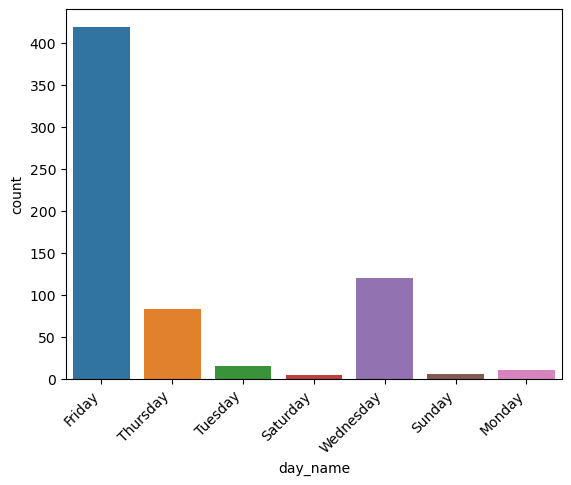

In [61]:
chart = sns.countplot(data=feature_films, x="day_name")
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'
)

In [ ]:
sns.countplot(data=feature_films, x="year")

[Text(0, 0, 'October'),
 Text(1, 0, 'December'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'November'),
 Text(10, 0, 'January'),
 Text(11, 0, 'February')]

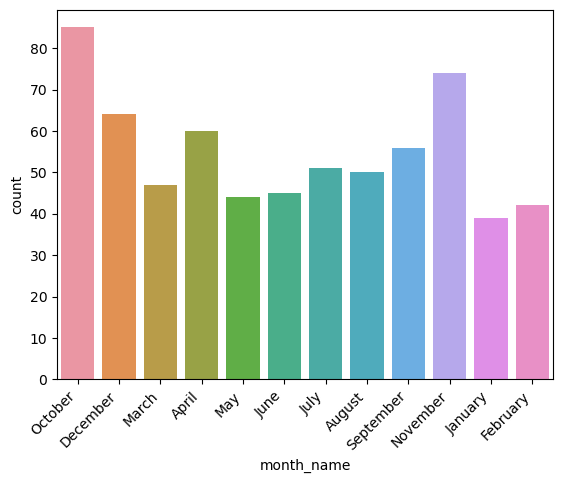

In [62]:
chart = sns.countplot(data=feature_films, x="month_name")
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'
)

[Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')]

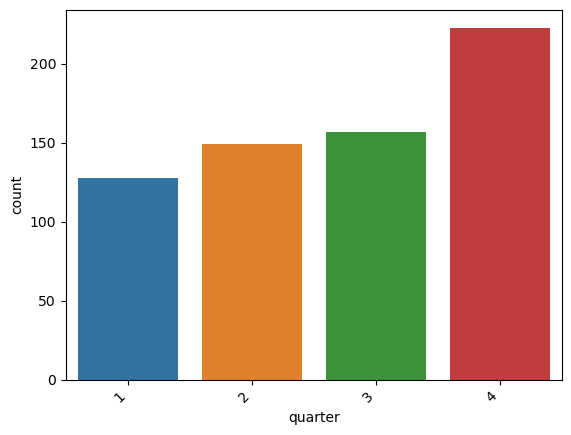

In [63]:
chart = sns.countplot(data=feature_films, x="quarter")
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'
)